# Analysis on National School Data in Indonesia
###### Data Science Final Project by Joshua Julio Adidjaja

### Introduction
The level of education has been one of the most essential factor in the development of a country. This report therefore focus on analyzing the state of Indonesian's education system in each province within 5-10 years period and will attempt to discover the element for a school to be success. The objective of these findings is going to be valuable for schools and other education department to grow and further turns Indonesia into a more advance country.

The dataset that is used for this observation could be access from the following link:

1. **Direktorat Jenderal Pendidikan Anak Usia Dini, Pendidikan Dasar dan Pendidikan Menengah Kementerian Pendidikan dan Kebudayaan**: [https://dapo.dikdasmen.kemdikbud.go.id/sp](https://dapo.dikdasmen.kemdikbud.go.id/sp)

2. **Pusat Data dan Teknologi Informasi**: [http://statistik.data.kemdikbud.go.id/](http://statistik.data.kemdikbud.go.id/)

3. **Badan Pusat Statistik**: [https://www.bps.go.id/](https://www.bps.go.id/)

4. **UN Kemendikbud**: [https://puspendik.kemdikbud.go.id/hasil-un/](https://puspendik.kemdikbud.go.id/hasil-un/)

5. **UNESCO Institute for Statistics (UIS)**: [http://data.uis.unesco.org/#](http://data.uis.unesco.org/#)

6. **United Nations Development Programme, Human Development Data (1990-2018)**: [http://hdr.undp.org/en/data#](http://hdr.undp.org/en/data#)

During the analysis, several questions are collected with the intention to stipulate the course of the analysis. The main questions this project aims to answer are:
1. What is the state of Indonesian education within the past 5-10 years nationally.
2. How large is the discrepancy/inequality in Indonesian education.
3. What is the parameters that contribute the most to a school success. 
4. How important each level of educations on improving Human Development  Index (HDI).

### Setting up the environment

In [1]:
#importing libraries
import pandas as pd 
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt
import math
import seaborn as sns

## 1. What is the state of Indonesian education within the past 5-10 years nationally

To find out the state of Indonesian education progressively, I want to find the trend of several indicator that could reveal how is the education in Indonesia. These indicators are:
1. Number of School
2. Student vs Teacher Ratio
3. School Participation Rate
4. Indonesian citizen education level (Illiterate and Information Technology)

### 1.1. Number of School

First, I simply want to analyze the growth of the number of school in Indonesia in general. There are 9 datasets that are downloaded from **Direktorat Jenderal Pendidikan Anak Usia Dini, Pendidikan Dasar dan Pendidikan Menengah Kementerian Pendidikan dan Kebudayaan** website. The datasets contain the number of school in each teaching semester from 2016 Spring until 2020 Spring. The dataset are grouped by the location(province) and level(Primary, Middle, High).

In [2]:
#Reading all the dataset and append it on df array
df_s = []
for i in range(1,10):
    names = "dataset/data_sekolah/df" + str(i) + ".csv"
    df_s.append(pd.read_csv(names, sep=";", header=[0,1], index_col=0, skiprows=1))
    arrays = [['province', 'Total', 'Total', 'Total', 'primary', 'primary', 'primary', 'middle', 'middle', 'middle', 'high', 'high', 'high', 'SMK', 'SMK', 'SMK', 'SLB', 'SLB', 'SLB'], ['province', 'total', 'N', 'S', 'total', 'N', 'S', 'total', 'N', 'S', 'total', 'N', 'S', 'total', 'N', 'S', 'total', 'N', 'S']]
    df_s[i-1].columns = pd.MultiIndex.from_arrays(arrays)
    
    repl_list = {r'\,':'', r'\.': '', 'Prov.':''}
    df_s[i-1]['province'] = df_s[i-1]['province']['province'].replace(repl_list, regex=True).str.strip().str.upper()
    temp = (df_s[i-1].iloc[:,1:]*1000).astype('int')
    temp[temp%1000==0] = temp[temp%1000==0]/1000 
    df_s[i-1] = pd.concat([df_s[i-1]['province'], temp], axis=1, join='inner')
    df_s[i-1] = df_s[i-1].set_index('province')
    
    df_s[i-1].columns = pd.MultiIndex.from_tuples(df_s[i-1].columns)
    

In [3]:
#Slicing the total of df_s
df_s_tl = []
sem = ["spring", "Fall"]
tahun = 2015
semester = []
for i in range(8,-1,-1):
    df_s_tl.append(pd.DataFrame(df_s[i].loc['TOTAL']).unstack()['TOTAL'])
    semester.append(str(tahun) + "/" + str(tahun+1) + " " + sem[i%2])
    if sem[i%2] == sem[0]:
        tahun += 1
    
df_s_fin = pd.concat(df_s_tl, axis=1)
col_name = [semester,['total', 'N', 'S']]
df_s_fin.columns = pd.MultiIndex.from_product(col_name)

In [4]:
#Dividing the table into total, public and private
df_s_total = df_s_fin.iloc[:,0::3]
df_s_n = df_s_fin.iloc[:,1::3]
df_s_s = df_s_fin.iloc[:,2::3]
df_s_total.columns = semester
df_s_n.columns = semester
df_s_s.columns = semester

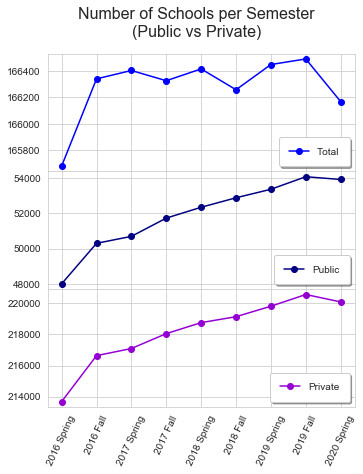

In [5]:
#Creating figure public vs private
sns.set_style("whitegrid")
fig, axs = plt.subplots(3, sharex=True, gridspec_kw={'hspace': 0})
axs[0].plot(semester, list(df_s_total.T['Total']), label='Total', marker='o', color='b')
axs[1].plot(semester, list(df_s_n.T['Total']), label='Public', marker='o', color='navy')
axs[2].plot(semester, list(df_s_s.T['Total']), label='Private', marker='o', color='darkviolet')

semester_axis = ['2016 Spring', '2016 Fall', '2017 Spring', '2017 Fall', '2018 Spring', '2018 Fall', '2019 Spring', '2019 Fall', '2020 Spring']

for ax in axs.flat:
    ax.label_outer()
plt.xticks(df_s_total.columns, semester_axis, rotation='65')
fig.set_size_inches(5.5, 6.5)

axs[0].legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, loc=4)
axs[1].legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, loc=4)
axs[2].legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, loc=4)

fig.suptitle('Number of Schools per Semester\n(Public vs Private)', fontsize=16)

plt.show()

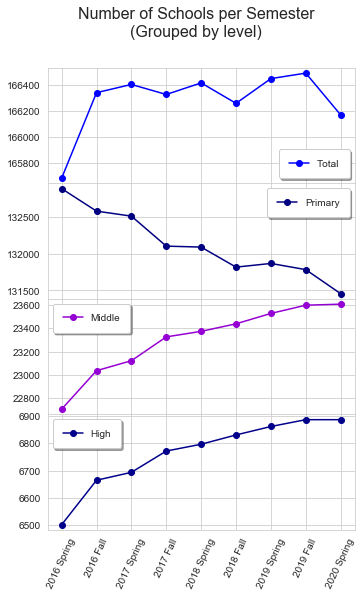

In [6]:
#Creating figure per level
sns.set_style("whitegrid")
fig, axs = plt.subplots(4, sharex=True, gridspec_kw={'hspace': 0})
axs[0].plot(semester, list(df_s_total.T['Total']), label='Total', marker='o', color='b')
axs[1].plot(semester, list(df_s_total.T['primary']), label='Primary', marker='o', color='navy')
axs[2].plot(semester, list(df_s_total.T['middle']), label='Middle', marker='o', color='darkviolet')
axs[3].plot(semester, list(df_s_total.T['high']), label='High', marker='o', color='darkblue')

for ax in axs.flat:
    ax.label_outer()
plt.xticks(df_s_total.columns, semester_axis, rotation='65')
fig.set_size_inches(5.5, 8.5)

axs[0].legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
axs[1].legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
axs[2].legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
axs[3].legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)

fig.suptitle('Number of Schools per Semester\n(Grouped by level)', fontsize=16)

plt.show()

**RESULT**
- From observing the *total* number of school in Indonesia grow significantly on the 2016 spring, then having a stable growth before decreasing in the 2020 spring. 
- The number of *private* school growth is inline with the *total* growth, but the number of *public* school fluctuated throughout the year.
- While the number of *primary* school grow with slight fluctuation, the growth of *middle* and *high* school are in lie with the *total* growth

The number of school in Indonesia, specifically all of the level (primary, middle, high) and type of school (public, private), increases throughout 9 semester.

### 1.2. Student vs Teacher Ratio

Next, I want to analyze the growth of student and teacher ratio throughout the year. From the same website, **Direktorat Jenderal Pendidikan Anak Usia Dini, Pendidikan Dasar dan Pendidikan Menengah Kementerian Pendidikan dan Kebudayaan**, 18 datasets are downloaded, which 9 of them contain the total number of student, while the other 9 of them contain the total number of teacher from the 2016 Spring until 2020 Spring. The dataset once again are grouped by the location(province) and level(Primary, Middle, High), and to answer the first question I focus on the total number of teacher and student growth in Indonesia.

In [7]:
#Reading all the dataset (student and teacher) and append it to df array
df_m = []
df_g = []
for i in range(1,10):
    names_m = "dataset/data_peserta_didik/df" + str(i) + ".csv"
    df_m.append(pd.read_csv(names_m, sep=";", header=[0,1], index_col=0, skiprows=1))
    
    names_g = "dataset/data_guru/df" + str(i) + ".csv"
    df_g.append(pd.read_csv(names_g, sep=";", header=[0,1], index_col=0, skiprows=1))
    
    arrays = [['province', 'Total', 'Total', 'Total', 'primary', 'primary', 'primary', 'middle', 'middle', 'middle', 'high', 'high', 'high', 'SMK', 'SMK', 'SMK', 'SLB', 'SLB', 'SLB'], ['province', 'total', 'N', 'S', 'total', 'N', 'S', 'total', 'N', 'S', 'total', 'N', 'S', 'total', 'N', 'S', 'total', 'N', 'S']]
    
    df_m[i-1].columns = pd.MultiIndex.from_arrays(arrays)
    repl_list = {r'\,':'', r'\.': '', 'Prov.':''}
    df_m[i-1]['province'] = df_m[i-1]['province']['province'].replace(repl_list, regex=True).str.strip().str.upper()
    df_m[i-1].iloc[:,1:] = df_m[i-1].iloc[:,1:].replace({r'\.':''}, regex=True).astype(int)
    temp = (df_m[i-1].iloc[:,1:])
    df_m[i-1] = pd.concat([df_m[i-1]['province'], temp], axis=1, join='inner')
    df_m[i-1] = df_m[i-1].set_index('province')
    df_m[i-1].columns = pd.MultiIndex.from_tuples(df_m[i-1].columns)
    
    
    df_g[i-1].columns = pd.MultiIndex.from_arrays(arrays)
    df_g[i-1]['province'] = df_g[i-1]['province']['province'].replace(repl_list, regex=True).str.strip().str.upper()
    df_g[i-1].iloc[:,1:] = df_g[i-1].iloc[:,1:].replace({r'\.':''}, regex=True).astype(int)
    temp = (df_g[i-1].iloc[:,1:])
    df_g[i-1] = pd.concat([df_g[i-1]['province'], temp], axis=1, join='inner')
    df_g[i-1] = df_g[i-1].set_index('province')
    df_g[i-1].columns = pd.MultiIndex.from_tuples(df_g[i-1].columns)

In [8]:
#Slicing the total of df_m and df_g
df_m_tl = []
df_g_tl = []
sem = ["spring", "Fall"]
tahun = 2015
semester = []

for i in range(8,-1,-1):
    df_m_tl.append(pd.DataFrame(df_m[i].loc['TOTAL']).unstack()['TOTAL'])
    df_g_tl.append(pd.DataFrame(df_g[i].loc['TOTAL']).unstack()['TOTAL'])
    semester.append(str(tahun) + "/" + str(tahun+1) + " " + sem[i%2])
    if sem[i%2] == sem[0]:
        tahun += 1
    
df_m_fin = pd.concat(df_m_tl, axis=1)
df_g_fin = pd.concat(df_g_tl, axis=1)

col_name = [semester,['total', 'N', 'S']]
df_m_fin.columns = pd.MultiIndex.from_product(col_name)
df_g_fin.columns = pd.MultiIndex.from_product(col_name)

In [9]:
#Dividing the table into total
df_m_total = df_m_fin.iloc[:,0::3]
df_m_total.columns = semester

df_g_total = df_g_fin.iloc[:,0::3]
df_g_total.columns = semester

#Finding the ratio of student to teacher
df_st_total = round(df_m_total/df_g_total, 3)

#Combining dataframe
df_st_fin = pd.concat([df_m_total.T['Total'], df_g_total.T['Total'], df_st_total.T['Total']], axis=1, join='inner')
df_st_fin.columns = ['# of Students', '# of Teachers', 'student/teacher']
df_st_fin.index = semester_axis
df_st_fin.style.set_properties(**{'text-align': 'center','width':'70px'}).set_table_styles([ dict(selector='th', props=[('text-align', 'center')])])

,# of Students,# of Teachers,student/teacher
2016 Spring,23041970,1127420,20.438
2016 Fall,23417529,1134048,20.65
2017 Spring,23300533,1123827,20.733
2017 Fall,23439712,993,23604.9
2018 Spring,23328482,989,23587.9
2018 Fall,23276656,981,23727.5
2019 Spring,23147995,977,23692.9
2019 Fall,23140896,958,24155.4
2020 Spring,23059521,949,24298.8


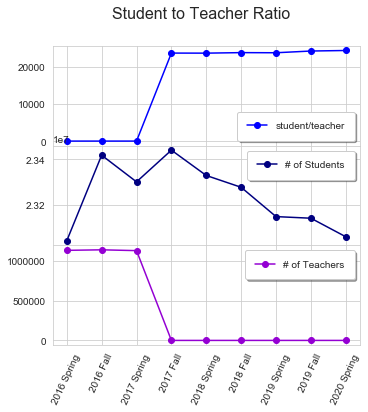

In [10]:
#Creating figure student to teacher ratio
sns.set_style("whitegrid")
fig, axs = plt.subplots(3, sharex=True, gridspec_kw={'hspace': 0})
axs[0].plot(semester, list(df_st_fin['student/teacher']), label='student/teacher', marker='o', color='b')
axs[1].plot(semester, list(df_st_fin['# of Students']), label='# of Students', marker='o', color='navy')
axs[2].plot(semester, list(df_st_fin['# of Teachers']), label='# of Teachers', marker='o', color='darkviolet')
for ax in axs.flat:
    ax.label_outer()
plt.xticks(df_s_total.columns, semester_axis, rotation='65')
fig.set_size_inches(5.5, 5.5)

axs[0].legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
axs[1].legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
axs[2].legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)


fig.suptitle('Student to Teacher Ratio', fontsize=16)

plt.show()

**RESULT**

To determine the trend of teacher and student in Indonesia, I created a new column called `Student to Teacher ratio` which values are obtained from the total number of student per total number of teacher in a semester. This column indicates the rough number of class capacity in a certain semester.

- The number of **Student to Teacher ratio** stays constant on about 15 students per teacher, before it experience a drastic increase in 2017 Fall to around 16 Student per Teacher, then it remain steady on that number on the rest of the semester.
- The occurence above happen because of a sudden drop on number of teacher on 2017 Fall, while the number of student decrease slowly.
- In total the number of **Student to Teacher ratio** still can be said to be constant as the average class capacity only increase by one student throughout 9 semesters.

### 1.3. School Participation Rate (NER)

As we can see from the previous analysis that the number of school in Indonesia increases throughout 9 semester. However, we presume that at the same time there is an increase in the number of population in Indonesia. So, I am interested to analyze the percentage of children who have access to the formal school education compare to who does not.

Net Enrolment Rate (NER) is an index indicating the percentage of student with a respective age that have an access to education compare to the total population of the same age. In this part I used APM value downloaded from the **Badan Pusat Statistik** website. The dataset consists of the NER percentage in 3 levels (Primary, Middle, High) of each province from the year of 2011-2019

In [11]:
#Read and clean the NER data
df_ner = pd.read_csv("dataset/apm.csv", header=[1,2], sep=";")
year = range(2011, 2020)
level = ["primary", "middle", "high"]
col_name = [str(i) + "-" + j for i in year for j in level]
df_ner.columns = ["Province"] + col_name
df_ner = df_ner.set_index("Province")
df_ner = df_ner.replace("-", 0)
df_ner = df_ner.astype(float)

In [12]:
#Separate the df_ner into per jenjang
primary_col = [i for i in range(len(df_ner.columns)) if df_ner.columns[i].find("primary")!=-1]
middle_col = [i for i in range(len(df_ner.columns)) if df_ner.columns[i].find("middle")!=-1]
high_col = [i for i in range(len(df_ner.columns)) if df_ner.columns[i].find("high")!=-1]

df_ner_primary = df_ner.iloc[:, primary_col]
df_ner_middle = df_ner.iloc[:, middle_col]
df_ner_high = df_ner.iloc[:, high_col]

df_ner_primary.columns = year
df_ner_middle.columns = year
df_ner_high.columns = year
df_ner_fin = pd.DataFrame(list(zip(df_ner_primary.loc['INDONESIA'], df_ner_middle.loc['INDONESIA'], df_ner_high.loc['INDONESIA'])), 
               columns =['Primary', 'Middle', 'High'])
df_ner_fin["Year"] = range(2011,2020)
df_ner_fin = df_ner_fin.set_index('Year')
df_ner_fin.T.style.set_properties(**{'text-align': 'center','width':'50px'}).set_table_styles([ dict(selector='th', props=[('text-align', 'center')] ) ])

Year,2011,2012,2013,2014,2015,2016,2017,2018,2019
Primary,91.07,92.54,95.59,96.45,96.7,96.82,97.19,97.58,97.64
Middle,68.36,70.93,73.88,77.53,77.82,77.95,78.4,78.84,79.4
High,48.07,51.88,54.25,59.35,59.71,59.95,60.37,60.67,60.84


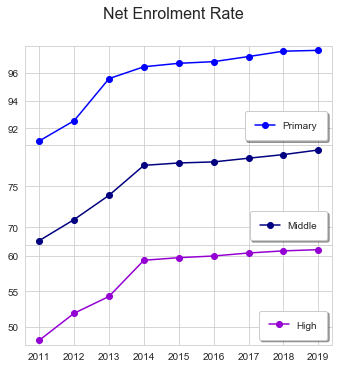

In [13]:
#Creating figure apm per jenjang
sns.set_style("whitegrid")
fig, axs = plt.subplots(3, sharex=True, gridspec_kw={'hspace': 0})
axs[0].plot(year, list(df_ner_fin['Primary']), label='Primary', marker='o', color='b')
axs[1].plot(year, list(df_ner_fin['Middle']), label='Middle', marker='o', color='navy')
axs[2].plot(year, list(df_ner_fin['High']), label='High', marker='o', color='darkviolet')
for ax in axs.flat:
    ax.label_outer()
    #ax.axis(ymin=50,ymax=100)
fig.set_size_inches(5.5, 5.5)

axs[0].legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, loc=4)
axs[1].legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, loc=4)
axs[2].legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, loc=4)


fig.suptitle('Net Enrolment Rate', fontsize=16)

plt.show()

**RESULT**

The **Net Enrolment Rates** of every level (Primary, Middle, High) increase every year, however, it's increasing rate has been decrease for the past 5 year.

### 1.4. Indonesian Citizen Education Level

Lastly, after analyzing the subject of Indonesian education (school building, teacher, student), I am interested in the trend of Indonesian citizen education level. The education level are determine from the proportion of illiterate citizen and the percentage of citizen with information and computer technology knowledge in the year of 2011-2019. The datasets are downloaded from **Badan Pusat Statistik** website. The data are grouped by the age category of `< 15`, `15-44` and `>= 44` year. For this observation we will only look at the `< 15` and `15-44`group as the group older than that does not really correspond to the condition of education gain from school over the past 10 years, as they have graduated before this period.

### 1.4.1. Illiterate Citizen

In [14]:
#Read illiterate percentage data
df_ill = pd.read_csv("dataset/buta_huruf.csv", header=[1,2], sep=";")
year = range(2011, 2020)
level = ["< 15", "15-44", ">= 45"]
col_name = [str(i) + " " + j for i in year for j in level]
df_ill.columns = ["Province"] + col_name
df_ill = df_ill.set_index("Province")
df_ill = df_ill.replace("-", 0)
df_ill = df_ill.astype(float)

In [15]:
#Separate into several column
col_1 = [i for i in range(len(df_ner.columns)) if df_ill.columns[i].find("< 15")!=-1]
col_2 = [i for i in range(len(df_ner.columns)) if df_ill.columns[i].find("15-44")!=-1]

df_ill_1 = df_ill.iloc[:, col_1]
df_ill_2 = df_ill.iloc[:, col_2]

df_ill_1.columns = year
df_ill_2.columns = year
df_ill_fin = pd.DataFrame(list(zip(df_ill_1.loc['INDONESIA'], df_ill_2.loc['INDONESIA'])), 
               columns =['< 15', '15-44'])
df_ill_fin["Year"] = range(2011,2020)
df_ill_fin = df_ill_fin.set_index('Year')
df_ill_fin.T.style.set_properties(**{'text-align': 'center','width':'50px'}).set_table_styles([ dict(selector='th', props=[('text-align', 'center')] ) ])
#df_ill_1.loc["INDONESIA"]

Year,2011,2012,2013,2014,2015,2016,2017,2018,2019
< 15,7.56,7.03,6.08,4.88,4.78,4.62,4.5,4.34,4.1
15-44,2.31,2.03,1.61,1.24,1.1,1,0.94,0.86,0.76


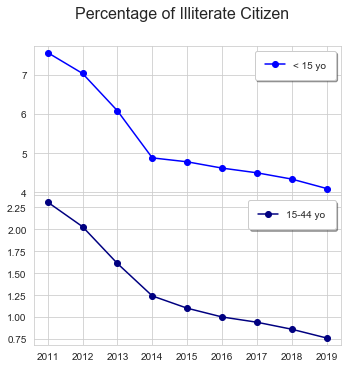

In [16]:
#Creating figure illiterate percentage
sns.set_style("whitegrid")
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0})
axs[0].plot(year, list(df_ill_fin['< 15']), label='< 15 yo', marker='o', color='b')
axs[1].plot(year, list(df_ill_fin['15-44']), label='15-44 yo', marker='o', color='navy')

for ax in axs.flat:
    ax.label_outer()

fig.set_size_inches(5.5, 5.5)

axs[0].legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
axs[1].legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)

fig.suptitle('Percentage of Illiterate Citizen', fontsize=16)

plt.show()

**RESULT**

The illiterate population percentage of both age group (< 15, 15-44) averagely decrease every year. The last survey in 2019 stated that there is only 4.1% of citizen under 15 years old could not read, while there is only 0.76% of 15-44 years old citizen.

### 1.4.2. Knowledge on Technology

The second indicator that determines the education level of Indonesian citizen is their knowledge on Technology. From **Badan Pusat Statistik website** a dataset showing the percentage of citizen from the age group of `15-24` with the knowledge on IT.

In [17]:
#Read the file
df_itk = pd.read_csv("dataset/tik.csv", sep=";").dropna()
df_itk.columns = ["Province", "2015", "2016", "2017", "2018", "2019"]
#repl_list = {',':'.', r'\.': '', r' ': ''}
df_itk["Province"] = df_itk["Province"].str.lstrip().str.upper()
df_itk = df_itk.set_index("Province")
df_itk_fin = pd.DataFrame(df_itk.T.loc[:,"INDONESIA"])

In [18]:
df_itk_fin.style.set_properties(**{'text-align': 'center','width':'70px'}).set_table_styles([ dict(selector='th', props=[('text-align', 'center')] ) ])

,INDONESIA
2015,51.83
2016,58.21
2017,68.93
2018,77.05
2019,83.58


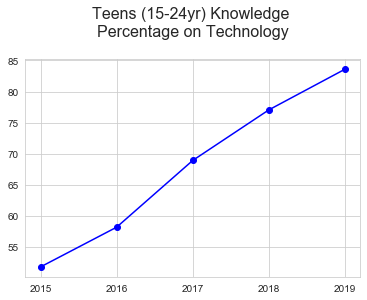

In [19]:
#Plotting the graph
sns.set_style("whitegrid")
fig, ax = plt.subplots()
y = df_itk.loc["INDONESIA"].values.reshape(-1, 1)
x = ["2015","2016","2017","2018","2019"]

ax.plot(x, y, marker='o', color='b')
ax.set_title('Teens (15-24yr) Knowledge \nPercentage on Technology\n', fontsize=16)

plt.show()

**RESULT**

There is a steady increase on the percentage of Indonesian teenager who have the understanding on technological field. There is only about 50% teenager who is capable in using technology 5 years ago, but now there is more than 80% who can use technology.

## 2. How large is the discrepancy/inequality in Indonesian education

To analyze the first question I mainly focus on looking the trend during a certain time line. In this second question, to analyze the discrepancy of Indonesian education, I will observe a certain indicator per province. The indicator that is utilized is the same with the first questions, which are:
1. Number of School
2. Student vs Teacher Ratio
3. School Participation Rate
4. Indonesian citizen education level (Illiterate and Information Technology)

### 2.1. Number of School per Area

The same number of school in 2019 datasets are obtained from **Direktorat Jenderal Pendidikan Anak Usia Dini, Pendidikan Dasar dan Pendidikan Menengah Kementerian Pendidikan dan Kebudayaan** website. It is improper to directly compare the number of school per province, because some province have a larger area compare to the other which could affect the number of school in it. Therefore to manage this problem, a datasets containing the area of each province are obtained from **Badan Pusat Statistik** website.

In [20]:
#Read the province area data and take the latest year
df_area = pd.read_csv("dataset\data_luas_wilayah\luas_wilayah.csv", sep=";", header=[0,1], index_col=0, skiprows=3)
df_area = df_area['2016'].dropna()
repl_list = {',':'.', r'\.': '', r' ': ''}
df_area["Luas 1"].replace(repl_list, regex=True, inplace=True)
df_area["Luas 1"] = df_area["Luas 1"].astype(int)
df_area["Luas 1"] /= 100
df_area.columns = ["Total Area"]
df_area.index = df_area.index.str.upper()

#Combine province area and number of school dataset
df_s_area = pd.concat([df_s[0]["Total"]['total'], df_area], axis=1, join='outer', sort=False).dropna()

#Creating area per total column
df_s_area["Area Coverage"] = df_s_area['Total Area']/df_s_area['total']

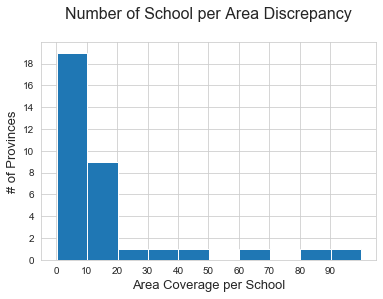

count     34.000000
mean      16.615669
std       23.592741
min        0.144413
25%        4.275769
50%        9.083515
75%       14.735035
max      100.089788
Name: Area Coverage, dtype: float64

In [21]:
# Plot Histogram
sns.set_style("whitegrid")
data = df_s_area["Area Coverage"]
w = 10
n = math.ceil((data.max() - data.min())/w)
ax = plt.hist(data, bins = n)

plt.title('Number of School per Area Discrepancy\n', fontsize=16)
plt.ylabel('# of Provinces', fontsize=13)
plt.xlabel('Area Coverage per School', fontsize=13)
plt.xticks(range(0,100,10))
plt.yticks(range(0,20,2))
#plt.savefig('Desktop/figure6')
plt.show()
data.describe()

In [22]:
#Searching for Upper bound Outlier
sorted(df_s_area["Area Coverage"])
q1, q3= np.percentile(df_s_area["Area Coverage"],[25,75])
iqr = q3 - q1
upper_bound = q3 +(1.5 * iqr)
lower_bound = q1 -(1.5 * iqr) 

print('upper bound outlier: ', upper_bound)
print('lower bound outlier: ', lower_bound)

#The province which is in the outlier
df_s_area.columns=['# of Schools','Total Area', 'Area Coverage']
df_s_area[df_s_area["Area Coverage"] > upper_bound].sort_values(["Area Coverage"], ascending=False).style.set_properties(**{'text-align': 'center','width':'100px'}).set_table_styles([ dict(selector='th', props=[('text-align', 'center')] ) ])

upper bound outlier:  30.423935329720678
lower bound outlier:  -11.413131326259832


,# of Schools,Total Area,Area Coverage
KALIMANTAN UTARA,754,75467.7,100.09
PAPUA,3687,319036,86.53
PAPUA BARAT,1567,99671.6,63.6067
KALIMANTAN TIMUR,3030,129067,42.5963
KALIMANTAN TENGAH,3868,153564,39.7013


In [23]:
#Searching for the top smallest Luas per total
df_s_area.sort_values(["Area Coverage"]).head().style.set_properties(**{'text-align': 'center','width':'100px'}).set_table_styles([ dict(selector='th', props=[('text-align', 'center')] ) ])

,# of Schools,Total Area,Area Coverage
DKI JAKARTA,4598,664.01,0.144413
DI YOGYAKARTA,2748,3133.15,1.14016
JAWA BARAT,30120,35377.8,1.17456
BANTEN,7557,9662.92,1.27867
JAWA TENGAH,24925,32800.7,1.31598


**Result**

The `Area Coverage` column indicate the average area of a school cover in a province which also means a province with a lower value has a better access to education. From the histogram, most of the province in Indonesia averagely have a school within less than 20 km square. 

The provinces with a better school access are generally located in the west and central part of Java island. Meanwhile, the capital of Indonesia, DKI Jakarta has an extremely low value (10 times lower than other neighbour province) that means there is a school in every 0.1 km square in Jakarta.

However, there are some school with **Area Coverage** that are significantly higher than the rest. Those school that fall into the upper bound outlier are located in Kalimantan and Papua island.

### 2.2. Student vs Teacher Ratio

The same number of student and teacher in 2019 datasets are obtained from **Direktorat Jenderal Pendidikan Anak Usia Dini, Pendidikan Dasar dan Pendidikan Menengah Kementerian Pendidikan dan Kebudayaan** website. Again this time, I will compare its ratio per province

In [24]:
#Take the latest number of student and teacher data and do some fixing

df_st = pd.concat([df_m[0]['Total'], df_g[0]['Total']], axis=1, join='inner')
df_st.columns = ["total Student", "Student N", "Student S", "total Teacher", "Teacher N", "Teacher S"]
df_st["Teacher N"] *= 1000
df_st["total Student"] = df_st["Student N"] + df_st["Student S"]
df_st["total Teacher"] = df_st["Teacher N"] + df_st["Teacher S"]
df_st["Student per Teacher"] = df_st['total Student']/df_st['total Teacher']
df_st = df_st.iloc[:,[0,3,6]]

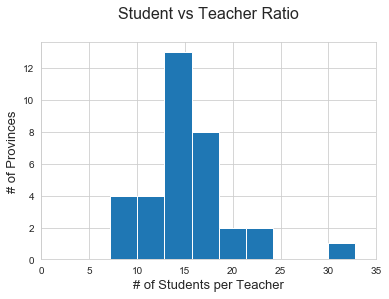

count    34.000000
mean     14.990983
std       4.792716
min       7.153312
25%      13.058702
50%      14.179980
75%      16.916316
max      32.786457
Name: Student per Teacher, dtype: float64

In [25]:
# Plot Histogram
sns.set_style("whitegrid")
data = df_st["Student per Teacher"].drop(["TOTAL", "LUAR NEGERI"])
w = 3
n = math.ceil((data.max() - data.min())/w)
ax = plt.hist(data, bins = n)

plt.title("Student vs Teacher Ratio\n", fontsize=16)
plt.ylabel("# of Provinces", fontsize=13)
plt.xlabel('# of Students per Teacher', fontsize=13)
plt.xticks(range(0,40,5))
plt.show()
data.describe()

In [26]:
# Finding outlier
data = df_st["Student per Teacher"].drop(["TOTAL", "LUAR NEGERI"])
iqr = data.describe()[6] - data.describe()[4]
lower_bound = data.describe()[4] -(1.5 * iqr) 
upper_bound = data.describe()[6] +(1.5 * iqr)

print('upper bound outlier: ', upper_bound)
print('lower bound outlier: ', lower_bound)

data_upper = pd.DataFrame(data[data > upper_bound])
data_upper.columns=['# of Students per Teacher']
data_upper = data_upper.rename_axis('Province')
display(data_upper.style.set_properties(**{'text-align': 'center','width':'100px'}).set_table_styles([ dict(selector='th', props=[('text-align', 'center')] ) ]))

data_lower = pd.DataFrame(data[data < lower_bound])
data_lower.columns=['# of Students per Teacher']
data_lower = data_lower.rename_axis('Province')
display(data_lower.style.set_properties(**{'text-align': 'center','width':'100px'}).set_table_styles([ dict(selector='th', props=[('text-align', 'center')] ) ]))

upper bound outlier:  22.702736337664824
lower bound outlier:  7.272281945152911


,# of Students per Teacher
Province,
SULAWESI TENGGARA,32.7865


,# of Students per Teacher
Province,
SULAWESI TENGAH,7.15331


In [27]:
#Insight from previous analysis
df_part = df_st.loc[['DKI JAKARTA', 'DI YOGYAKARTA', 'JAWA BARAT', 'BANTEN', 'JAWA TENGAH', 'KALIMANTAN TENGAH', 'KALIMANTAN TIMUR', 'PAPUA', 'PAPUA BARAT', 'KALIMANTAN UTARA']].sort_values('Student per Teacher')
df_part.columns = ['# of Students','# of Teachers', '# of Students per Teacher']
df_part = df_part.rename_axis('Province')
df_part.style.set_properties(**{'text-align': 'center','width':'100px'}).set_table_styles([ dict(selector='th', props=[('text-align', 'center')])])

,# of Students,# of Teachers,# of Students per Teacher
Province,,,
KALIMANTAN TIMUR,385507,43076,8.94946
KALIMANTAN TENGAH,481758,38891,12.3874
KALIMANTAN UTARA,136622,10052,13.5915
DI YOGYAKARTA,568298,39241,14.4823
PAPUA BARAT,219673,13161,16.6912
JAWA TENGAH,5140654,294928,17.4302
DKI JAKARTA,1557840,80267,19.4082
PAPUA,641470,30342,21.1413
JAWA BARAT,8011091,373947,21.4231


**RESULT**

From the observation, we found out that the average ratio of student every one teacher in 2019 is 14.7 and there is only one upper bound outlier which is Sulawesi Tenggara and a lower bound outlier which is Sulawesi Tengah. From this we can assume that there is a discrepancy in the class capacity between Sulawesi Province alone

Another insight we obtain is that, while provinces in Kalimantan is considered as having lack access to school (from observation 2.1.), its Student vs Ratio is lower than the mean, meaning there is no lack of teacher in Kalimantan. On the other hand, the provinces in Java and Papua island have this value higher than the mean.

### 2.3. Net Enrolment Rate (NER)

Next I will observe the NER percentage per level (Primary, Middle, High) and will analayze how will each province perform.

In [28]:
#Create a new total column and find its summarry
df_ner_c = pd.concat([df_ner_primary[2019], df_ner_middle[2019], df_ner_high[2019]], axis=1, join = 'outer')
df_ner_c.columns = ['Primary', 'Middle', 'High']
df_ner_c['Average'] = (df_ner_c['Primary'] + df_ner_c['Middle'] + df_ner_c['High'])/3
df_ner_c.describe().style

,Primary,Middle,High,Average
count,35,35,35,35
mean,96.9866,77.3757,61.89,78.7508
std,3.50947,6.11218,6.05558,4.61382
min,79.19,57.19,44.32,60.2333
25%,96.95,74.49,58.605,77.1867
50%,97.91,78.42,61.77,79.08
75%,98.665,80.84,65.085,80.9333
max,99.53,86.75,73.01,85.88


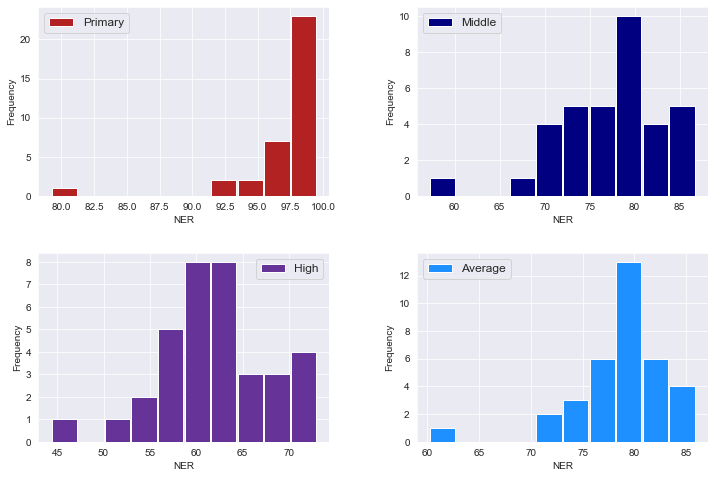

In [29]:
#Plotting the graph
sns.set_style("darkgrid")
fig, axes = plt.subplots(2,2, figsize=(12,8))
fig.subplots_adjust(wspace=0.3, hspace=0.3)
ax0, ax1, ax2, ax3 = axes.flatten()


ax0.hist(df_ner_c['Primary'], histtype='bar', color='firebrick', label='Primary', rwidth=0.95)
ax0.legend(prop={'size': 12})
ax0.set_xlabel('NER')
ax0.set_ylabel('Frequency')


ax1.hist(df_ner_c['Middle'], histtype='bar', color='navy', label='Middle', rwidth=0.95)
ax1.legend(prop={'size': 12})
ax1.set_xlabel('NER')
ax1.set_ylabel('Frequency')


ax2.hist(df_ner_c['High'], histtype='bar', color='rebeccapurple', label='High', rwidth=0.95)
ax2.legend(prop={'size': 12})
ax2.set_xlabel('NER')
ax2.set_ylabel('Frequency')

ax3.hist(df_ner_c['Average'], histtype='bar', color='dodgerblue', label='Average', rwidth=0.95)
ax3.legend(prop={'size': 12})
ax3.set_xlabel('NER')
ax3.set_ylabel('Frequency')

plt.show()

In [30]:
#Finding the other lowest apm
df_ner_c.sort_values('Average').head().rename_axis("Province").style.set_properties(**{'text-align': 'center','width':'70px'}).set_table_styles([ dict(selector='th', props=[('text-align', 'center')])])

,Primary,Middle,High,Average
Province,,,,
PAPUA,79.19,57.19,44.32,60.2333
KALIMANTAN BARAT,97.09,66.67,51.21,71.6567
NUSA TENGGARA TIMUR,96.16,69.19,53.68,73.01
SULAWESI BARAT,95.86,69.36,57.64,74.2867
GORONTALO,98.41,70.28,57.52,75.4033


In [31]:
#Finding the highest apm
df_ner_c.sort_values('Average', ascending=False).head().rename_axis("Province").style.set_properties(**{'text-align': 'center','width':'70px'}).set_table_styles([ dict(selector='th', props=[('text-align', 'center')])])

,Primary,Middle,High,Average
Province,,,,
KEP. RIAU,99.13,85.54,72.97,85.88
BALI,96.81,86.75,73.01,85.5233
ACEH,99.12,86.48,70.35,85.3167
DI YOGYAKARTA,99.53,84.04,70.49,84.6867
NUSA TENGGARA BARAT,98.87,83.92,66.04,82.9433


**RESULT**

From the observation, again Papua Province shown a low total score on the NER which is even a lot more smaller in number rather than it second worse. Most of the Kalimantan Province (except Kalimantan Timur) also has a low NER percentage. Since Kalimantan Timur has the best number of student against teacher ratio and also a high NER percentage, we deduce that there is a discrepancy in the education throughout Kalimantan island.

Meanwhile, the province who has the highest total NER percentage are Riau, Bali, and some other province who have relatively smaller area.

### 2.4. Education Level

### 2.4.1. Illiterate Citizen Percentage

In [32]:
#Setting the dataset
df_ill_c = pd.concat([df_ill_1[2019], df_ill_2[2019]], axis=1, join='outer')
df_ill_c.columns = ['< 15', '15-44']
df_ill_c.describe().style.set_properties(**{'text-align': 'center','width':'90px'}).set_table_styles([ dict(selector='th', props=[('text-align', 'center')])])

,< 15,15-44
count,35,35
mean,3.69,1.16229
std,4.24818,3.39093
min,0.2,0.05
25%,1.105,0.12
50%,1.91,0.23
75%,5.28,0.845
max,22,20.21


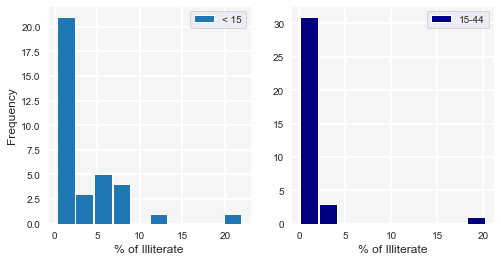

In [33]:
#Plot Histogram
sns.set_style("darkgrid")
fig, axes = plt.subplots(1,2, figsize=(8,4))
ax0, ax1 = axes.flatten()

ax0.hist(df_ill_c['< 15'], histtype='bar', label='< 15', rwidth=0.95)
ax0.legend(prop={'size': 10})
ax0.set_xlabel('% of Illiterate', fontsize=12)
ax0.set_ylabel('Frequency', fontsize=12)
ax0.grid(color="white", lw=2)
ax0.set_facecolor('whitesmoke')
ax0.set_axisbelow(True)

ax1.hist(df_ill_c['15-44'], histtype='bar', color='navy', label='15-44', rwidth=0.95)
ax1.legend(prop={'size': 10})
ax1.set_xlabel('% of Illiterate', fontsize=12)
#ax1.set_ylabel('Frequency')
ax1.grid(color="white", lw=2)
ax1.set_facecolor('whitesmoke')
ax1.set_axisbelow(True)

In [34]:
# Finding outlier
data=df_ill_c['< 15']
iqr = data.describe()[6] - data.describe()[4]
lower_bound = data.describe()[4] -(1.5 * iqr) 
upper_bound = data.describe()[6] +(1.5 * iqr)
df_ill_o1 = pd.DataFrame(data[data > upper_bound])

data=df_ill_c['15-44']
iqr = data.describe()[6] - data.describe()[4]
lower_bound = data.describe()[4] -(1.5 * iqr) 
upper_bound = data.describe()[6] +(1.5 * iqr)
df_ill_o2 = pd.DataFrame(data[data > upper_bound])

df_ill_ol = pd.concat([df_ill_o1, df_ill_o2], axis=1, join='outer', sort=False)
df_ill_ol.sort_values('< 15', ascending=False).style.set_properties(**{'text-align': 'center','width':'90px'}).set_table_styles([ dict(selector='th', props=[('text-align', 'center')])])

,< 15,15-44
PAPUA,22,20.21
NUSA TENGGARA BARAT,12.41,2.46
NUSA TENGGARA TIMUR,nan,2.51
SULAWESI BARAT,nan,2.31


**RESULT**

From the observation, both Papua has a very high percentage of illiterate citizen in both age category (< 15 and 15-44).

### 2.4.2. Knowledge on Technology

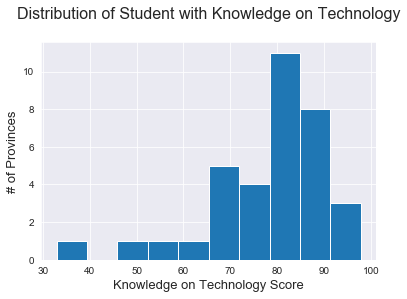

count    35.000000
mean     78.397143
std      13.569783
min      32.880000
25%      73.710000
50%      81.220000
75%      87.575000
max      97.910000
Name: 2019, dtype: float64

In [35]:
##### Plot Histogram
sns.set_style('darkgrid')
data = df_itk['2019']
ax = plt.hist(data)
plt.title("Distribution of Student with Knowledge on Technology\n", fontsize=16)
plt.ylabel("# of Provinces", fontsize=13)
plt.xlabel('Knowledge on Technology Score', fontsize=13)
plt.show()

df_itk['2019'].describe()

In [36]:
# Finding Outlier
iqr = df_itk["2019"].describe()[6] - df_itk["2019"].describe()[4]
lower_bound = df_itk["2019"].describe()[4] -(1.5 * iqr) 
upper_bound = df_itk["2019"].describe()[6] +(1.5 * iqr)
df_itk[df_itk["2019"] < lower_bound].sort_values('2019').rename_axis("Province").style.set_properties(**{'text-align': 'center','width':'60px'}).set_table_styles([ dict(selector='th', props=[('text-align', 'center')])])

,2015,2016,2017,2018,2019
Province,,,,,
PAPUA,17.03,23.09,30.42,33.48,32.88
NUSA TENGGARA TIMUR,22.49,29.12,38.68,43.32,51.03
MALUKU UTARA,27.15,30.15,35.19,49.32,52.88


In [37]:
df_itk.sort_values('2019', ascending=False).head().rename_axis("Province").style.set_properties(**{'text-align': 'center','width':'60px'}).set_table_styles([ dict(selector='th', props=[('text-align', 'center')])])

,2015,2016,2017,2018,2019
Province,,,,,
DI YOGYAKARTA,83.22,85.43,92.19,95.48,97.91
DKI JAKARTA,80.01,82.53,89.93,92.15,95.41
KEP. RIAU,68.63,76.6,84.48,86.37,93.05
BALI,66.63,76.42,81.45,87.56,91.4
JAWA TENGAH,55.99,63.63,75.51,83.33,90.93


**RESULT**

From the observation, the teenagers in Papua, East Nusa Tenggara and North Maluku provinces have low knowledge on technology. There are even only 33% of teenager in Papua adopt technology on their daily life compare to the top percentage user of technology such as Yogyakarta and Jakarta who have more than 95%, the number is incredibly low. 

## 3. What is the parameters that contribute the most to a school success (High School)

### Success School Measurement

In this analysis, I measured a school quality by its National Exam Score (NES). We believe that if a province achieve a higher average NES, the school in that province are more successful. Therefore I extract the average NES in each province from (https://puspendik.kemdikbud.go.id/hasil-un/)[https://puspendik.kemdikbud.go.id/hasil-un/].

In [38]:
# Read and clean NES per province data
df_nes = pd.read_csv("dataset/data_un/nilai_un_sma.csv",sep=";", header = [0,1], index_col=1, skiprows=3).iloc[:,1:-1]
df_nes.columns = ["Province", "Jumlah Satuan Pendidikan", "Jumlah Peserta", "B Indonesia", "B Inggris", "Matematika", "Fisika", "Kimia", "Biologi", "Average NES"]
#repl_list = {r'\,': '.'}
#df_nes["Rerata Nilai"].replace(repl_list, regex=True, inplace=True)
#df_nes["Rerata Nilai"] = df_nes["Rerata Nilai"].astype(float)

df_nes.at[28, 'Province'] = "KEPULAUAN BANGKA BELITUNG"
df_nes = df_nes.set_index("Province") 
df_nes = df_nes.sort_values('Average NES', ascending=False)
pd.DataFrame(df_nes["Average NES"].head()).style.set_properties(**{'text-align': 'center','width':'100px'}).set_table_styles([ dict(selector='th', props=[('text-align', 'center')])])

,Average NES
Province,
DKI JAKARTA,66.9
DI YOGYAKARTA,65.35
JAWA TENGAH,59.32
BALI,57.59
KEPULAUAN RIAU,57.34


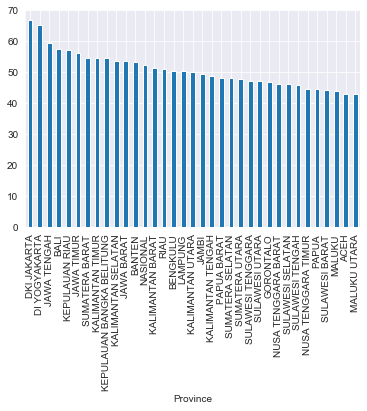

In [39]:
df_nes = df_nes.sort_values('Average NES', ascending=False)
df_nes["Average NES"].plot.bar()

As we can see, the province who achieve the highest NES are all located in the Java island. Therefore, we can assume the school in that province are averagely more successful than other school located in other province.

Next I am going to compare several parameters that may have the correlation with the National Exam Score (NES). Hopefully, we found a certain indicators that could determine the success of the school. The parameters that we are interested to find are:
- Teachers' Education Background
- Teachers' Teaching Experience (years)
- School Resources Condition (Laboratory, Library, Classroom and Health Facilties)
- Technological Knowledge

**Correlation Coefficient**

In the following analysis I will calculate the Pearson Correlation coefficient of NES and each of the parameter. This Coefficient will determine how strong they are correlated. The coefficient range will be between -1 until 1, which negative value means they are negatively correlated and positive value means they are positively correlated. The strength of the correlation will be as follow:
- 0:       No correlation
- 0-0.5:   Weak correlation
    
- 0.5-0.8: Moderate correlation
- 0.8-1:   Strong correlation

### 3.1. National Exam Score vs Teachers' Education Background

In [40]:
#Highest education achievement
df_tedbg = pd.read_csv("dataset/data_resource/ijazah_tertinggi_guru.csv").iloc[2:,[0,5,6,7]].dropna(how="all")
df_tedbg.columns = ["Province", "< High School", ">= High School", "Total"]
repl_list = {'\d+':'', r'\,': '.', r'Prov.':'', r'\.':''}
df_tedbg["Province"].replace(repl_list, regex=True, inplace=True)
df_tedbg["Province"] = df_tedbg["Province"].str.lstrip().str.upper()
df_tedbg.replace({r'\,':''}, regex=True, inplace=True)
df_tedbg[["< High School", ">= High School", "Total"]]=df_tedbg[["< High School", ">= High School", "Total"]].astype(int)
df_tedbg=df_tedbg.reset_index().iloc[:,1:]
df_tedbg.set_index("Province", inplace=True)

In [41]:
#Percentage of teacher with higher education (>=high)
df_tedbg["Percentage"] = df_tedbg[">= High School"] / df_tedbg["Total"] *100
df_tedbg.head().style.set_properties(**{'text-align': 'center','width':'100px'}).set_table_styles([ dict(selector='th', props=[('text-align', 'center')] ) ])

,< High School,>= High School,Total,Percentage
Province,,,,
DKI JAKARTA,306,1883,2189,86.021
JAWA BARAT,1192,6724,7916,84.9419
JAWA TENGAH,481,5134,5615,91.4337
DI YOGYAKARTA,127,915,1042,87.8119
JAWA TIMUR,780,5496,6276,87.5717


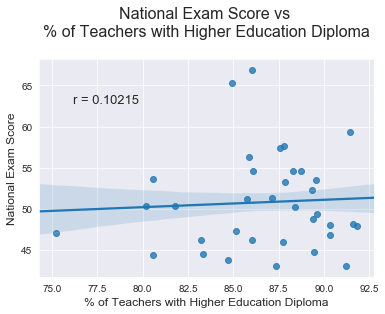

In [42]:
#Combine higher education teachers and NES
sns.set_style('darkgrid')
df_nes_tedbg = pd.concat([df_nes["Average NES"], df_tedbg["Percentage"]], axis=1, join="inner")
sns.regplot(df_tedbg["Percentage"], df_nes["Average NES"],ci=75)
plt.title("National Exam Score vs \n% of Teachers with Higher Education Diploma\n",fontsize=16)
plt.xlabel("% of Teachers with Higher Education Diploma", fontsize=12)
plt.ylabel("National Exam Score", fontsize=12)

#Find Pearson correlation
corr_value = round(df_nes_tedbg.corr(method='pearson').iloc[0]['Percentage'],5)
plt.annotate("r = %s" %corr_value, xy=(0.10, 0.80), xycoords='axes fraction', fontsize=13)


plt.show()

**RESULT**

After calculating the Pearson Correlation Coefficient of NES and teacher's education background, we discover that their coefficient is 0.1 which mean they are **Weakly Correlated**

### 3.2. NES vs Teachers' Teaching Experience (years)

In [43]:
#Teaching Experience (years)
df_tte = pd.read_csv("dataset/data_resource/masa_kerja_guru.csv").iloc[:,[1,2,4,6,8,10,12,14]].dropna(how='all')
df_tte.columns = ["Province", "<=4", "5-9", "10-14", "15-19", "20-24", ">=25", "Total"]
repl_list = {'\d+':'', r'\,': '.', r'Prov.':'', r'\.':''}
df_tte["Province"].replace(repl_list, regex=True, inplace=True)
df_tte["Province"] = df_tte["Province"].str.lstrip().str.upper()
df_tte.replace({r'\,':''}, regex=True, inplace=True)
#df_tte.iloc[:,1:]=df_tte.iloc[:,1:].astype(int)
df_tte.dropna()
df_tte.set_index("Province", inplace=True)
df_tte=df_tte.astype(int)
#df_tte.dtypes

In [44]:
#Find avergae of Teachers' teaching experience in each province
year = [2,7,12,17,22,27]
df_tte["Average Teaching Years"] = 0

for i in range(0,len(year)):
    df_tte["Average Teaching Years"] += year[i] * df_tte[df_tte.columns[i]]

df_tte["Average Teaching Years"] = round(df_tte["Average Teaching Years"]/df_tte["Total"],3)
df_tte.sort_values("Average Teaching Years").head().style.set_properties(**{'text-align': 'center','width':'70px'}).set_table_styles([ dict(selector='th', props=[('text-align', 'center')] ) ])

,<=4,5-9,10-14,15-19,20-24,>=25,Total,Average Teaching Years
Province,,,,,,,,
DKI JAKARTA,6517,2085,817,650,384,681,8701,8.656
PAPUA,1988,1184,585,267,110,130,3316,8.973
MALUKU UTARA,1419,951,500,173,109,97,2527,9.281
KALIMANTAN BARAT,3291,1947,1195,397,141,259,5464,9.406
NUSA TENGGARA TIMUR,5683,4666,1835,753,304,336,10008,9.453


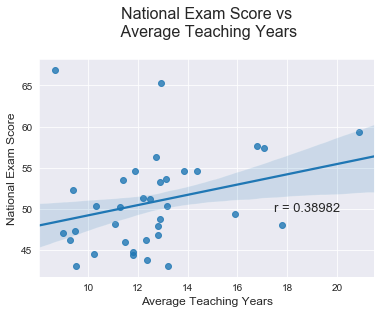

In [45]:
#Combine NES and Teaching Experience
sns.set_style('darkgrid')
df_nes_tte = pd.concat([df_nes["Average NES"], df_tte["Average Teaching Years"]], axis=1, join="inner")
sns.regplot(df_tte["Average Teaching Years"], df_nes["Average NES"],ci=75)
plt.title("National Exam Score vs\n Average Teaching Years\n", fontsize=16)
plt.xlabel("Average Teaching Years", fontsize=12)
plt.ylabel("National Exam Score", fontsize=12)

#Find Pearson correlation
corr_value = round(df_nes_tte.corr(method='pearson').iloc[0]['Average Teaching Years'],5)
plt.annotate("r = %s" %corr_value, xy=(0.70, 0.30), xycoords='axes fraction', fontsize=13)


plt.show()

**RESULT**

After calculating the Pearson Correlation Coefficient of NES and the teacher's teaching experience, we discover that their coefficient is around 0.4 which mean they are **Weakly Correlated**

### 3.3. NES vs Resources

In [46]:
#Laboratory Condition
df_lab = pd.read_csv("dataset/data_resource/kondisi_laboratorium_ipa.csv").iloc[:,[0,3,5,7,9,11,13]].dropna(how='all')
df_lab.columns = ["Province", "Good", "Light Damaged", "Moderate Damaged", "Heavy Damaged", "Totally Damaged", "Total"]
repl_list = {'\d+':'', r'\,': '.', r'Prov.':'', r'\.':''}
df_lab["Province"].replace(repl_list, regex=True, inplace=True)
df_lab["Province"] = df_lab["Province"].str.lstrip().str.upper()
df_lab.replace({r'\,':''}, regex=True, inplace=True)
df_lab[["Good", "Light Damaged", "Moderate Damaged", "Heavy Damaged", "Totally Damaged", "Total"]]=df_lab[["Good", "Light Damaged", "Moderate Damaged", "Heavy Damaged", "Totally Damaged", "Total"]].astype(int)
df_lab.set_index("Province", inplace=True)

#Find the percentage of Good resource
df_lab["% of Science Lab"] = round (df_lab["Good"] / df_lab["Total"],3)
df_lab.sort_values("% of Science Lab", ascending=False).head().style.set_properties(**{'text-align': 'center','width':'100px'}).set_table_styles([ dict(selector='th', props=[('text-align', 'center')] ) ])

,Good,Light Damaged,Moderate Damaged,Heavy Damaged,Totally Damaged,Total,% of Science Lab
Province,,,,,,,
DKI JAKARTA,697,607,10,1,0,1315,0.53
KEPULAUAN RIAU,109,124,12,6,0,251,0.434
BALI,135,180,7,9,0,331,0.408
BANTEN,364,454,44,36,0,898,0.405
KALIMANTAN SELATAN,132,202,8,6,0,348,0.379


In [47]:
#Library Condition
df_lib = pd.read_csv("dataset/data_resource/kondisi_perpustakaan.csv").iloc[:,[0,3,5,7,9,11,13]].dropna(how='all')
df_lib.columns = ["Province", "Good", "Light Damaged", "Moderate Damaged", "Heavy Damaged", "Totally Damaged", "Total"]
repl_list = {'\d+':'', r'\,': '.', r'Prov.':'', r'\.':''}
df_lib["Province"].replace(repl_list, regex=True, inplace=True)
df_lib["Province"] = df_lib["Province"].str.lstrip().str.upper()
df_lib.replace({r'\,':''}, regex=True, inplace=True)
df_lib[["Good", "Light Damaged", "Moderate Damaged", "Heavy Damaged", "Totally Damaged", "Total"]]=df_lib[["Good", "Light Damaged", "Moderate Damaged", "Heavy Damaged", "Totally Damaged", "Total"]].astype(int)
df_lib.set_index("Province", inplace=True)

#Find the percentage of Good resource
df_lib["% of Library"] = round (df_lib["Good"] / df_lib["Total"],3)
df_lib.sort_values("% of Library", ascending=False).head().style.set_properties(**{'text-align': 'center','width':'100px'}).set_table_styles([ dict(selector='th', props=[('text-align', 'center')] ) ])

,Good,Light Damaged,Moderate Damaged,Heavy Damaged,Totally Damaged,Total,% of Library
Province,,,,,,,
DKI JAKARTA,239,244,7,2,0,492,0.486
KEPULAUAN RIAU,63,70,3,1,0,137,0.46
KALIMANTAN SELATAN,75,111,2,9,0,197,0.381
BALI,60,94,3,1,0,158,0.38
KALIMANTAN TIMUR,73,131,5,5,0,214,0.341


In [48]:
#Classroom Condition
df_cls = pd.read_csv("dataset/data_resource/kondisi_ruang_kelas.csv").iloc[:,[0,3,5,7,9,11,13]].dropna(how='all')
df_cls.columns = ["Province", "Good", "Light Damaged", "Moderate Damaged", "Heavy Damaged", "Totally Damaged", "Total"]
repl_list = {'\d+':'', r'\,': '.', r'Prov.':'', r'\.':''}
df_cls["Province"].replace(repl_list, regex=True, inplace=True)
df_cls["Province"] = df_cls["Province"].str.lstrip().str.upper()
df_cls.replace({r'\,':''}, regex=True, inplace=True)
df_cls[["Good", "Light Damaged", "Moderate Damaged", "Heavy Damaged", "Totally Damaged", "Total"]]=df_cls[["Good", "Light Damaged", "Moderate Damaged", "Heavy Damaged", "Totally Damaged", "Total"]].astype(int)
df_cls.set_index("Province", inplace=True)

#Find the percentage of Good resource
df_cls["% of Classroom"] = round (df_cls["Good"] / df_cls["Total"],3)
df_cls.sort_values("% of Classroom", ascending=False).head().style.set_properties(**{'text-align': 'center','width':'100px'}).set_table_styles([ dict(selector='th', props=[('text-align', 'center')] ) ])

,Good,Light Damaged,Moderate Damaged,Heavy Damaged,Totally Damaged,Total,% of Classroom
Province,,,,,,,
DKI JAKARTA,3286,3116,53,0,0,6455,0.509
BALI,1080,1673,35,10,0,2798,0.386
KEPULAUAN RIAU,616,937,69,16,0,1638,0.376
KEPULAUAN BANGKA BELITUNG,350,540,34,39,0,963,0.363
KALIMANTAN SELATAN,871,1501,59,15,0,2446,0.356


In [49]:
#Health Facility Condition
df_hf = pd.read_csv("dataset/data_resource/kondisi_usaha_kesehatan.csv").iloc[:,[0,3,5,7,9,11,13]].dropna(how='all')
df_hf.columns = ["Province", "Good", "Light Damaged", "Moderate Damaged", "Heavy Damaged", "Totally Damaged", "Total"]
repl_list = {'\d+':'', r'\,': '.', r'Prov.':'', r'\.':''}
df_hf["Province"].replace(repl_list, regex=True, inplace=True)
df_hf["Province"] = df_hf["Province"].str.lstrip().str.upper()
df_hf.replace({r'\,':''}, regex=True, inplace=True)
df_hf[["Good", "Light Damaged", "Moderate Damaged", "Heavy Damaged", "Totally Damaged", "Total"]]=df_hf[["Good", "Light Damaged", "Moderate Damaged", "Heavy Damaged", "Totally Damaged", "Total"]].astype(int)
df_hf.set_index("Province", inplace=True)

#Find the percentage of Good resource
df_hf["% of Health Facility"] = round (df_hf["Good"] / df_hf["Total"],3)
df_hf.sort_values("% of Health Facility", ascending=False).head().style.set_properties(**{'text-align': 'center','width':'100px'}).set_table_styles([ dict(selector='th', props=[('text-align', 'center')] ) ])

,Good,Light Damaged,Moderate Damaged,Heavy Damaged,Totally Damaged,Total,% of Health Facility
Province,,,,,,,
DKI JAKARTA,220,200,3,0,0,423,0.52
KEPULAUAN RIAU,34,37,7,0,0,78,0.436
BALI,51,64,3,2,0,120,0.425
KALIMANTAN SELATAN,49,70,0,2,0,121,0.405
BANTEN,116,173,11,8,0,308,0.377


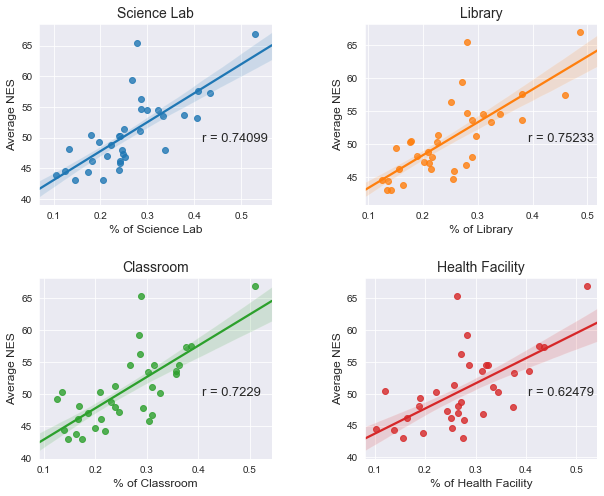

In [50]:
#Combine RESOURCES and NES
df_nes_res = pd.concat([df_nes["Average NES"], df_lab["% of Science Lab"], df_lib["% of Library"], df_cls["% of Classroom"], df_hf["% of Health Facility"]], axis=1, join="inner")
#df_nes_res
fig, axes = plt.subplots(2,2, figsize=(10,8))
fig.subplots_adjust(wspace=0.4, hspace=0.4)
ax0, ax1, ax2, ax3 = axes.flatten()

sns.regplot(df_nes_res["% of Science Lab"], df_nes_res["Average NES"], ci=75, ax=ax0)
ax0.set_title("Science Lab", fontdict={'fontsize': 14})
ax0.set_xlabel("% of Science Lab", fontsize=12)
ax0.set_ylabel("Average NES", fontsize=12)
corr_value0 = round(df_nes_res.corr(method='pearson').iloc[0]['% of Science Lab'],5)
ax0.annotate("r = %s" %corr_value0, xy=(0.70, 0.35), xycoords='axes fraction', fontsize=13)

sns.regplot(df_nes_res["% of Library"], df_nes_res["Average NES"], ci=75, ax=ax1)
ax1.set_title("Library", fontdict={'fontsize': 14})
ax1.set_xlabel("% of Library", fontsize=12)
ax1.set_ylabel("Average NES", fontsize=12)
corr_value1 = round(df_nes_res.corr(method='pearson').iloc[0]['% of Library'],5)
ax1.annotate("r = %s" %corr_value1, xy=(0.70, 0.35), xycoords='axes fraction', fontsize=13)

sns.regplot(df_nes_res["% of Classroom"], df_nes_res["Average NES"], ci=75, ax=ax2)
ax2.set_title("Classroom", fontdict={'fontsize': 14})
ax2.set_xlabel("% of Classroom", fontsize=12)
ax2.set_ylabel("Average NES", fontsize=12)
corr_value2 = round(df_nes_res.corr(method='pearson').iloc[0]['% of Classroom'],5)
ax2.annotate("r = %s" %corr_value2, xy=(0.70, 0.35), xycoords='axes fraction', fontsize=13)

sns.regplot(df_nes_res["% of Health Facility"], df_nes_res["Average NES"], ci=75, ax=ax3)
ax3.set_title("Health Facility", fontdict={'fontsize': 14})
ax3.set_xlabel("% of Health Facility", fontsize=12)
ax3.set_ylabel("Average NES", fontsize=12)
corr_value3 = round(df_nes_res.corr(method='pearson').iloc[0]['% of Health Facility'],5)
ax3.annotate("r = %s" %corr_value3, xy=(0.70, 0.35), xycoords='axes fraction', fontsize=13)


plt.show()

**RESULT**

After calculating the Pearson Correlation Coefficient of NES and the condition of school resources, we discover that their coefficient is around 0.7 which mean they are **Moderately Correlated**

### NES vs Technology

In [51]:
#Preparing the data
df_itk = pd.read_csv("dataset/keterampilan_tik.csv", sep=";").dropna()
df_itk.columns = ["Province", "2015", "2016", "2017", "2018", "2019"]
#repl_list = {',':'.', r'\.': '', r' ': ''}
df_itk["Province"].str.lstrip()

df_itk["Province"].replace({r'KEP.':'KEPULAUAN'}, regex=True, inplace=True)
df_itk = df_itk.set_index("Province")
#pd.DataFrame(df_itk.sort_values('2019', ascending=False)["2019"].head(10))

x = pd.DataFrame(df_itk.sort_values('2019', ascending=False).drop("INDONESIA")["2019"])
x.columns = ["Knowledge on Technology Score"]
df_itk["2019"]
df_nes_tik = pd.concat([df_nes["Average NES"], x], axis=1, join="inner")
df_nes_tik.head().style.set_properties(**{'text-align': 'center','width':'100px'}).set_table_styles([ dict(selector='th', props=[('text-align', 'center')] ) ])

,Average NES,Knowledge on Technology Score
Province,,
DKI JAKARTA,66.9,85.17
DI YOGYAKARTA,65.35,75.04
JAWA TENGAH,59.32,58.75
BALI,57.59,65.48
KEPULAUAN RIAU,57.34,77.18


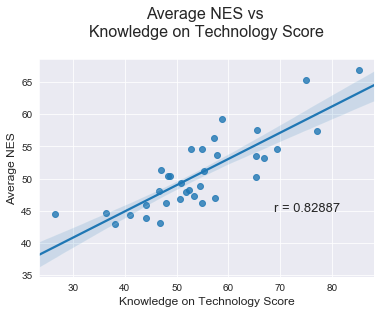

In [52]:
sns.set_style('darkgrid')
sns.regplot(df_nes_tik["Knowledge on Technology Score"], df_nes_tik["Average NES"], ci=75)
plt.title("Average NES vs \nKnowledge on Technology Score\n", fontsize=16)
plt.xlabel("Knowledge on Technology Score", fontsize=12)
plt.ylabel("Average NES", fontsize=12)

corr_value = round(df_nes_tik.corr(method='pearson').iloc[0]['Knowledge on Technology Score'],5)
plt.annotate("r = %s" %corr_value, xy=(0.70, 0.30), xycoords='axes fraction', fontsize=13)

plt.show()

**RESULT**

After calculating the Pearson Correlation Coefficient of NES and the teenagers' knowledge on technology percentage, we discover that their coefficient is around 0.8 which mean they are **Strongly Correlated**

## 4. How important each level of educations on improving Human Development  Index (HDI).

To analyze the the last question I mainly focus on the Net Enrolment Rate of each education levels in every country, taken from
**UNESCO Institute for Statistics (UIS)**. Then compared and correlate these data with the HDI index from **United Nations Development Programme, Human Development Data (1990-2018)**.

In [53]:
#Preparing the HDI data
df_hdi = pd.read_csv("dataset/HDI.csv", sep=',', header=[1], na_values = ['..'])
df_hdi.drop(columns=['HDI Rank (2018)', '1990', '1991', '1992', '1993', '1994','1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003','2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012'], inplace=True)
df_hdi.drop(df_hdi.tail(17).index, inplace=True)
df_hdi['Average HDI'] = df_hdi.mean(axis=1)
df_hdi = df_hdi[df_hdi['Average HDI'].notna()]
df_hdi.set_index("Country", inplace=True)

df_hdi

,2013,2014,2015,2016,2017,2018,Average HDI
Country,,,,,,,
Afghanistan,0.485,0.488,0.490,0.491,0.493,0.496,0.490500
Albania,0.781,0.787,0.788,0.788,0.789,0.791,0.787333
Algeria,0.746,0.749,0.751,0.755,0.758,0.759,0.753000
Andorra,0.846,0.853,0.850,0.854,0.852,0.857,0.852000
Angola,0.547,0.557,0.565,0.570,0.576,0.574,0.564833
...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),0.772,0.770,0.763,0.752,0.735,0.726,0.753000
Viet Nam,0.673,0.675,0.680,0.685,0.690,0.693,0.682667
Yemen,0.506,0.504,0.493,0.477,0.463,0.463,0.484333


In [54]:
#Preparing the NER data
df_nerh = pd.read_csv("dataset/Net_enrolment_rate_high.csv", sep=',', na_values=['..'])
df_nerh['Average NER High'] = df_nerh.mean(axis=1)
df_nerh = df_nerh[df_nerh['Average NER High'].notna()]
df_nerh.set_index("Country", inplace=True)


df_nerm = pd.read_csv("dataset/Net_enrolment_rate_middle.csv", sep=',', na_values=['..'])
df_nerm['Average NER Middle'] = df_nerm.mean(axis=1)
df_nerm = df_nerm[df_nerm['Average NER Middle'].notna()]
df_nerm.set_index("Country", inplace=True)


df_nerp = pd.read_csv("dataset/Net_enrolment_rate_primary.csv", sep=',', na_values=['..'])
df_nerp['Average NER Primary'] = df_nerp.mean(axis=1)
df_nerp = df_nerp[df_nerp['Average NER Primary'].notna()]
df_nerp.set_index("Country", inplace=True)

In [55]:
df_hdi_ners = pd.concat([df_hdi['Average HDI'], df_nerh['Average NER High'], df_nerm['Average NER Middle'], df_nerp['Average NER Primary']], axis=1, join='inner')
df_hdi_ners

,Average HDI,Average NER High,Average NER Middle,Average NER Primary
Country,,,,
Albania,0.787333,84.230570,95.328243,97.280963
Antigua and Barbuda,0.771000,86.210180,97.619608,97.518628
Argentina,0.827833,88.702444,99.639104,99.710498
Australia,0.933000,98.486407,99.162170,99.880838
Austria,0.906833,91.610180,98.280626,99.519752
...,...,...,...,...
Uzbekistan,0.699167,83.857114,94.316097,98.938865
Vanuatu,0.592167,56.255660,96.598030,92.147720
Venezuela (Bolivarian Republic of),0.753000,74.199658,91.039802,93.153090


In [56]:
df_hdi_ners.corr(method='pearson')

,Average HDI,Average NER High,Average NER Middle,Average NER Primary
Average HDI,1.000000,0.893470,0.824981,0.621928
Average NER High,0.893470,1.000000,0.899537,0.660060
Average NER Middle,0.824981,0.899537,1.000000,0.816787
Average NER Primary,0.621928,0.660060,0.816787,1.000000


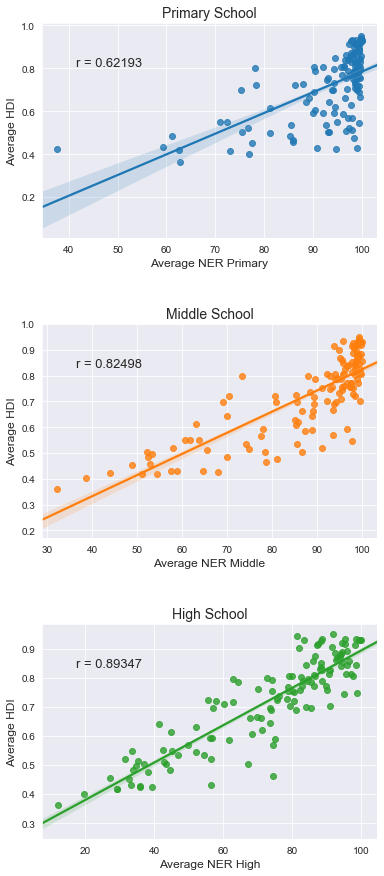

In [57]:
sns.set_style('darkgrid')

#df_nes_res
fig, axes = plt.subplots(3,1, figsize=(6,15))
fig.subplots_adjust(wspace=0.4, hspace=0.4)
ax0, ax1, ax2 = axes.flatten()

sns.regplot(df_hdi_ners["Average NER Primary"], df_hdi_ners["Average HDI"], ci=75, ax=ax0)
ax0.set_title("Primary School", fontdict={'fontsize': 14})
ax0.set_xlabel("Average NER Primary", fontsize=12)
ax0.set_ylabel("Average HDI", fontsize=12)
corr_value0 = round(df_hdi_ners.corr(method='pearson').iloc[0]['Average NER Primary'],5)
ax0.annotate("r = %s" %corr_value0, xy=(0.10, 0.80), xycoords='axes fraction', fontsize=13)

sns.regplot(df_hdi_ners["Average NER Middle"], df_hdi_ners["Average HDI"], ci=75, ax=ax1)
ax1.set_title("Middle School", fontdict={'fontsize': 14})
ax1.set_xlabel("Average NER Middle", fontsize=12)
ax1.set_ylabel("Average HDI", fontsize=12)
corr_value1 = round(df_hdi_ners.corr(method='pearson').iloc[0]['Average NER Middle'],5)
ax1.annotate("r = %s" %corr_value1, xy=(0.10, 0.80), xycoords='axes fraction', fontsize=13)

sns.regplot(df_hdi_ners["Average NER High"], df_hdi_ners["Average HDI"], ci=75, ax=ax2)
ax2.set_title("High School", fontdict={'fontsize': 14})
ax2.set_xlabel("Average NER High", fontsize=12)
ax2.set_ylabel("Average HDI", fontsize=12)
corr_value2= round(df_hdi_ners.corr(method='pearson').iloc[0]['Average NER High'],5)
ax2.annotate("r = %s" %corr_value2, xy=(0.10, 0.80), xycoords='axes fraction', fontsize=13)

plt.show()

**RESULT**

The primary school has lowest correlation with HDI, because most countries have been trying to provide minimum education to their citizens. Therefore, primary school NER cannot show the difference in HDI per country, but it clearly shows that minimum education also sets the minimum bar for HDI.

As for the middle school and high school have strong correlation above 0.8. It clearly emphasize the importance of high school education to improve a country’s HDI.